In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [23]:
correlations =df.corr()

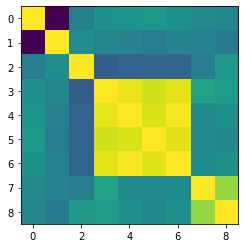

In [24]:
plt.imshow(correlations)

In [25]:
x = df.total_rooms.values.reshape(-1,1)
y = df.households.values.reshape(-1, 1)

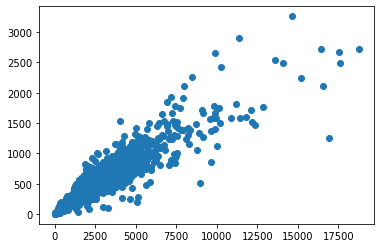

In [26]:
plt.scatter(x[::10], y[::10])

In [37]:
def get_params():
    params = {
    'W':np.random.randn(*(1, 1)),
    'b':np.zeros((1,1))
    }
    return params

In [38]:
def model(inp, params):
    z = np.dot(inp, params['W']) + params['b']
    return z

In [39]:
def get_grads(params):
    grad_dict = dict()
    for key in params.keys():
        grad_dict['d' + key] = np.zeros(params[key].shape)
    return grad_dict

In [40]:
def train(x, y, epochs = 1000, lr= 1e-3):
    
    costs = []
    params= get_params()
    grads = get_grads(params)
    
    for epoch in range(epochs):
        
        prediction = model(x, params)
        
        
        cost = np.mean((prediction - y)**2)/2
        
        error = (prediction-y)/y.shape[0]
        grads['dW'] = np.dot(x.T, error)
        grads['db'] = np.sum(error, axis = 0, keepdims = True)
        
        for key in params.keys():
             params[key]-= lr* grads['d' + key]
        
        if epoch%100 == 0:
            print('Error at epoch ' + str(epoch), cost)
        
        if epoch%10 == 0:
            costs.append(cost)
    
    return costs, params

In [49]:
costs, params = train(x, y, lr= 1e-9)

Error at epoch 0 5190876.276090137
Error at epoch 100 500486.76246414374
Error at epoch 200 58532.2641126126
Error at epoch 300 16888.861495709665
Error at epoch 400 12964.989198115603
Error at epoch 500 12595.260122303329
Error at epoch 600 12560.422121061807
Error at epoch 700 12557.139413129757
Error at epoch 800 12556.830019840752
Error at epoch 900 12556.800788738168


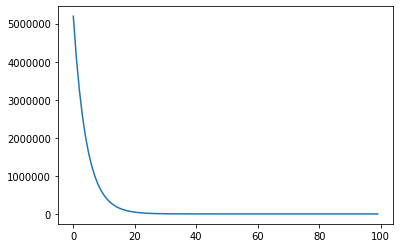

In [50]:
plt.plot(costs)

In [51]:
prediction = model(x, params)

Text(0, 0.5, 'Households')

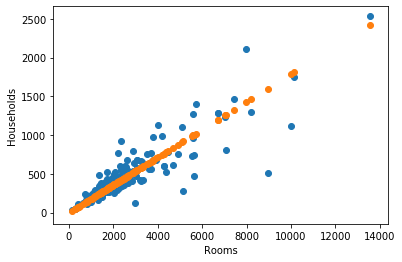

In [55]:
plt.scatter(x[::100], y[::100])
plt.scatter(x[::100], prediction[::100])
plt.xlabel('Rooms')
plt.ylabel('Households')

In [56]:
params

{'W': array([[0.17846135]]), 'b': array([[0.00024089]])}